<a href="https://colab.research.google.com/github/johsheldon/IMSE-541-Public/blob/main/Lab_3_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

stat=3.586, p=0.053
Fail to reject the null hypothesis, the flow rate does not affect etch uniformity


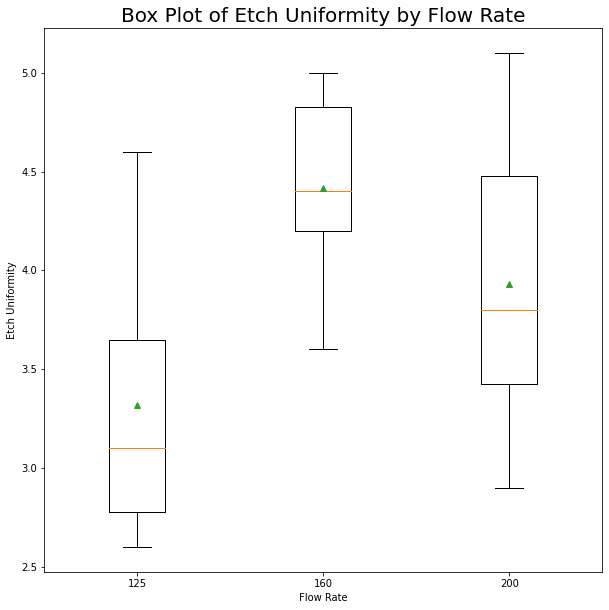

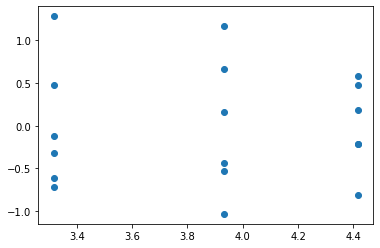

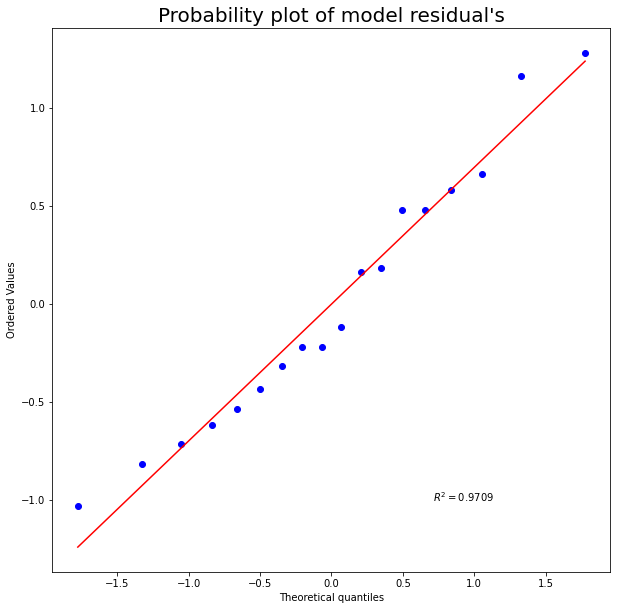

In [25]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

#4.35a:
CF125= [2.7,2.6,4.6,3.2,3.0,3.8]
CF160= [4.6,4.9,5.0,4.2,3.6,4.2]
CF200= [4.6,2.9,3.4,3.5,4.1,5.1]
stat, p=f_oneway(CF125, CF160, CF200)
print('stat=%.3f, p=%.3f' %(stat,p))
if p >= 0.05:
  print('Fail to reject the null hypothesis, the flow rate does not affect etch uniformity')

#4.35b:
# Box plots by factor levels'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Etch Uniformity by Flow Rate", fontsize= 20)
ax.set

#data2 = [df['Strength'][df['Conc'] == 5],
#             df['Strength'][df['Conc'] == 10],
#             df['Strength'][df['Conc'] == 15],
#             df['Strength'][df['Conc'] == 20]]

data2=[CF125, CF160, CF200]

ax.boxplot(data2,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Etch Uniformity")

plt.show()
#A flow rate of 125 is the best.
#4.35c:
Flow = pd.read_csv('https://raw.githubusercontent.com/johsheldon/IMSE-541-Public/main/4.35.csv', sep=',')
model = ols('Uniformity ~ C(Flow)', data=Flow).fit()
uniformity=model.predict()
uniformity
residuals=model.resid
residuals
plt.scatter(uniformity, residuals)

plt.show()
#Residuals decrease with higher flow rates.
#4.35d:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()
#Passes the fat pencil test, the data is normal.


In [39]:
Z = ((31.4-30)/0.336)
Z

4.1666666666666625

In [43]:
p = (1-stats.norm.cdf(Z))*2
p
p2 = (1-stats.norm.cdf(Z))
p2

1.545429688232236e-05

In [58]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
Engine = pd.read_csv('https://raw.githubusercontent.com/johsheldon/IMSE-541-Public/main/4.47.csv', sep=',')
print(Engine)
model2 = ols('BrakeHorsepower ~ rpm + RoadOctaneNumber + Compression', Engine).fit()
print(model2.summary())

    BrakeHorsepower   rpm  RoadOctaneNumber  Compression
0               225  2000                90          100
1               212  1800                94           95
2               229  2400                88          110
3               222  1900                91           96
4               219  1600                86          100
5               278  2500                96          110
6               246  3000                94           98
7               237  3200                90          100
8               233  2800                88          105
9               224  3400                86           97
10              223  1800                90          100
11              230  2500                89          104
                            OLS Regression Results                            
Dep. Variable:        BrakeHorsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:               

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


order of observations/residuals is
[12, 5, 9, 11, 8, 1, 4, 2, 10, 7, 3, 6]
MSE=SSE/(n-p)= [[47.78962014]]
SSR= [[163366.48493816]]
SSE= [[621.26506184]]
SST= 163987.75
MSR= [[81683.24246908]]
F0= [[1709.22560647]]
p val= [[2.22044605e-16]]


Ttest_1sampResult(statistic=-13.87885027038587, pvalue=2.5743880840064206e-08)

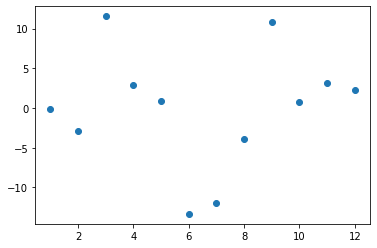

In [71]:
from pandas.core.window.expanding import ExpandingIndexer
eij=model2.resid
import random
c=list(range(1, 13))
order=random.sample(c, 12)
print('order of observations/residuals is')
print(order)
import random
N = len(eij)
c = list(range(1, 13))
x = random.sample(c, 12) #this should be replaced by the exact run order
y = eij

plt.scatter(x, y)
One=np.array([1]*12)
One
rpm=np.array(Engine['rpm'])
RoadOctaneNumber=np.array(Engine['RoadOctaneNumber'])
Compression=np.array(Engine['Compression'])
HP=np.asmatrix([One, rpm, RoadOctaneNumber, Compression])
HP
X=HP.transpose()
X
HPX=np.matmul(HP, X)
HPX
Y=np.array(Engine['BrakeHorsepower'])
Y=Y.transpose()
HPY= np.matmul(HP, Y)
HPY
XXinv=np.linalg.inv(HPX)
beta=np.matmul(XXinv, HPY.transpose())
beta
beta.shape
betap=beta.transpose()
betap.shape
Y=np.array(Engine['BrakeHorsepower'])
#np.matmul(Y.transpose(), Y)
B=np.matmul(Y, Y)
C=np.matmul(beta.transpose(), HPY.transpose())
SSE=B-C
n=16
p=3
MSE= SSE/(n-p)

print('MSE=SSE/(n-p)= %s' %MSE)
D = Y*Y
D= D.sum()
E=(Y.sum())**2/n
SST = D-E
SSR= SST - SSE

print('SSR= %s' %SSR)
print('SSE= %s' %SSE)
print('SST= %s' %SST)
MSR = SSR/(p-1)
F0=MSR/MSE
# compute p value of F0
pval=1-scipy.stats.f.cdf(F0,p-1, n-p) #find p-value of F test statistics
print('MSR= %s' %MSR)
print('F0= %s' %F0)
print('p val= %s' %pval)
t = Engine['Compression']-Engine['RoadOctaneNumber']-Engine['rpm']
stats.ttest_1samp(t, 0)